# Análise exploratória de dados - Vendas de Refrigerante

### Importação e tratamento de dados

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as sts
import seaborn as sns
import matplotlib as mpl
df = pd.read_excel("Dataset.xlsx", sheet_name=1)
df.tail()

# Há 3738 elementos e 9 colunas

,Retailer,Retailer ID,Date,Month,Region,State,Beverage Brand,Price per Unit,Units Sold
3734,Sodapop,1185732,2022-12-20,1900-01-12,Northeast,New Hampshire,Diet Coke,0.65,4000
3735,Sodapop,1185732,2022-12-20,1900-01-12,Northeast,New Hampshire,Sprite,0.65,3750
3736,Sodapop,1185732,2022-12-20,1900-01-12,Northeast,New Hampshire,Fanta,0.65,3250
3737,Sodapop,1185732,2022-12-20,1900-01-12,Northeast,New Hampshire,Powerade,0.75,3250
3738,Sodapop,1185732,2022-12-20,1900-01-12,Northeast,New Hampshire,Dasani Water,0.80,4250


In [108]:
# Checar se há dados nulos
df.isnull().sum()

Retailer          0
Retailer ID       0
Date              0
Month             0
Region            0
State             0
Beverage Brand    0
Price per Unit    0
Units Sold        0
dtype: int64

In [109]:
# Checar tipos dos dados
df.dtypes

Retailer                  object
Retailer ID                int64
Date              datetime64[ns]
Month             datetime64[ns]
Region                    object
State                     object
Beverage Brand            object
Price per Unit           float64
Units Sold                 int64
dtype: object

In [110]:
# Correção das datas
Day = []
Month = []
Year = []
for x in df.Date:
    Day += [x.day]
    Month += [x.month]
    Year += [x.year]
    
df["_Day"] = Day
df["_Month"] = Month
df["_Year"] = Year
df.tail()

,Retailer,Retailer ID,Date,Month,Region,State,Beverage Brand,Price per Unit,Units Sold,_Day,_Month,_Year
3734,Sodapop,1185732,2022-12-20,1900-01-12,Northeast,New Hampshire,Diet Coke,0.65,4000,20,12,2022
3735,Sodapop,1185732,2022-12-20,1900-01-12,Northeast,New Hampshire,Sprite,0.65,3750,20,12,2022
3736,Sodapop,1185732,2022-12-20,1900-01-12,Northeast,New Hampshire,Fanta,0.65,3250,20,12,2022
3737,Sodapop,1185732,2022-12-20,1900-01-12,Northeast,New Hampshire,Powerade,0.75,3250,20,12,2022
3738,Sodapop,1185732,2022-12-20,1900-01-12,Northeast,New Hampshire,Dasani Water,0.80,4250,20,12,2022


### Exploração de Dados

In [111]:
# Removendo colunas que não serão utilizadas
df_analysis = df.drop(["Retailer ID", "Date", "Month"], axis = 1)
df_analysis.tail()

,Retailer,Region,State,Beverage Brand,Price per Unit,Units Sold,_Day,_Month,_Year
3734,Sodapop,Northeast,New Hampshire,Diet Coke,0.65,4000,20,12,2022
3735,Sodapop,Northeast,New Hampshire,Sprite,0.65,3750,20,12,2022
3736,Sodapop,Northeast,New Hampshire,Fanta,0.65,3250,20,12,2022
3737,Sodapop,Northeast,New Hampshire,Powerade,0.75,3250,20,12,2022
3738,Sodapop,Northeast,New Hampshire,Dasani Water,0.80,4250,20,12,2022


array([[<AxesSubplot:title={'center':'Price per Unit'}>,
        <AxesSubplot:title={'center':'Units Sold'}>],
       [<AxesSubplot:title={'center':'_Day'}>,
        <AxesSubplot:title={'center':'_Month'}>],
       [<AxesSubplot:title={'center':'_Year'}>, <AxesSubplot:>]],
      dtype=object)

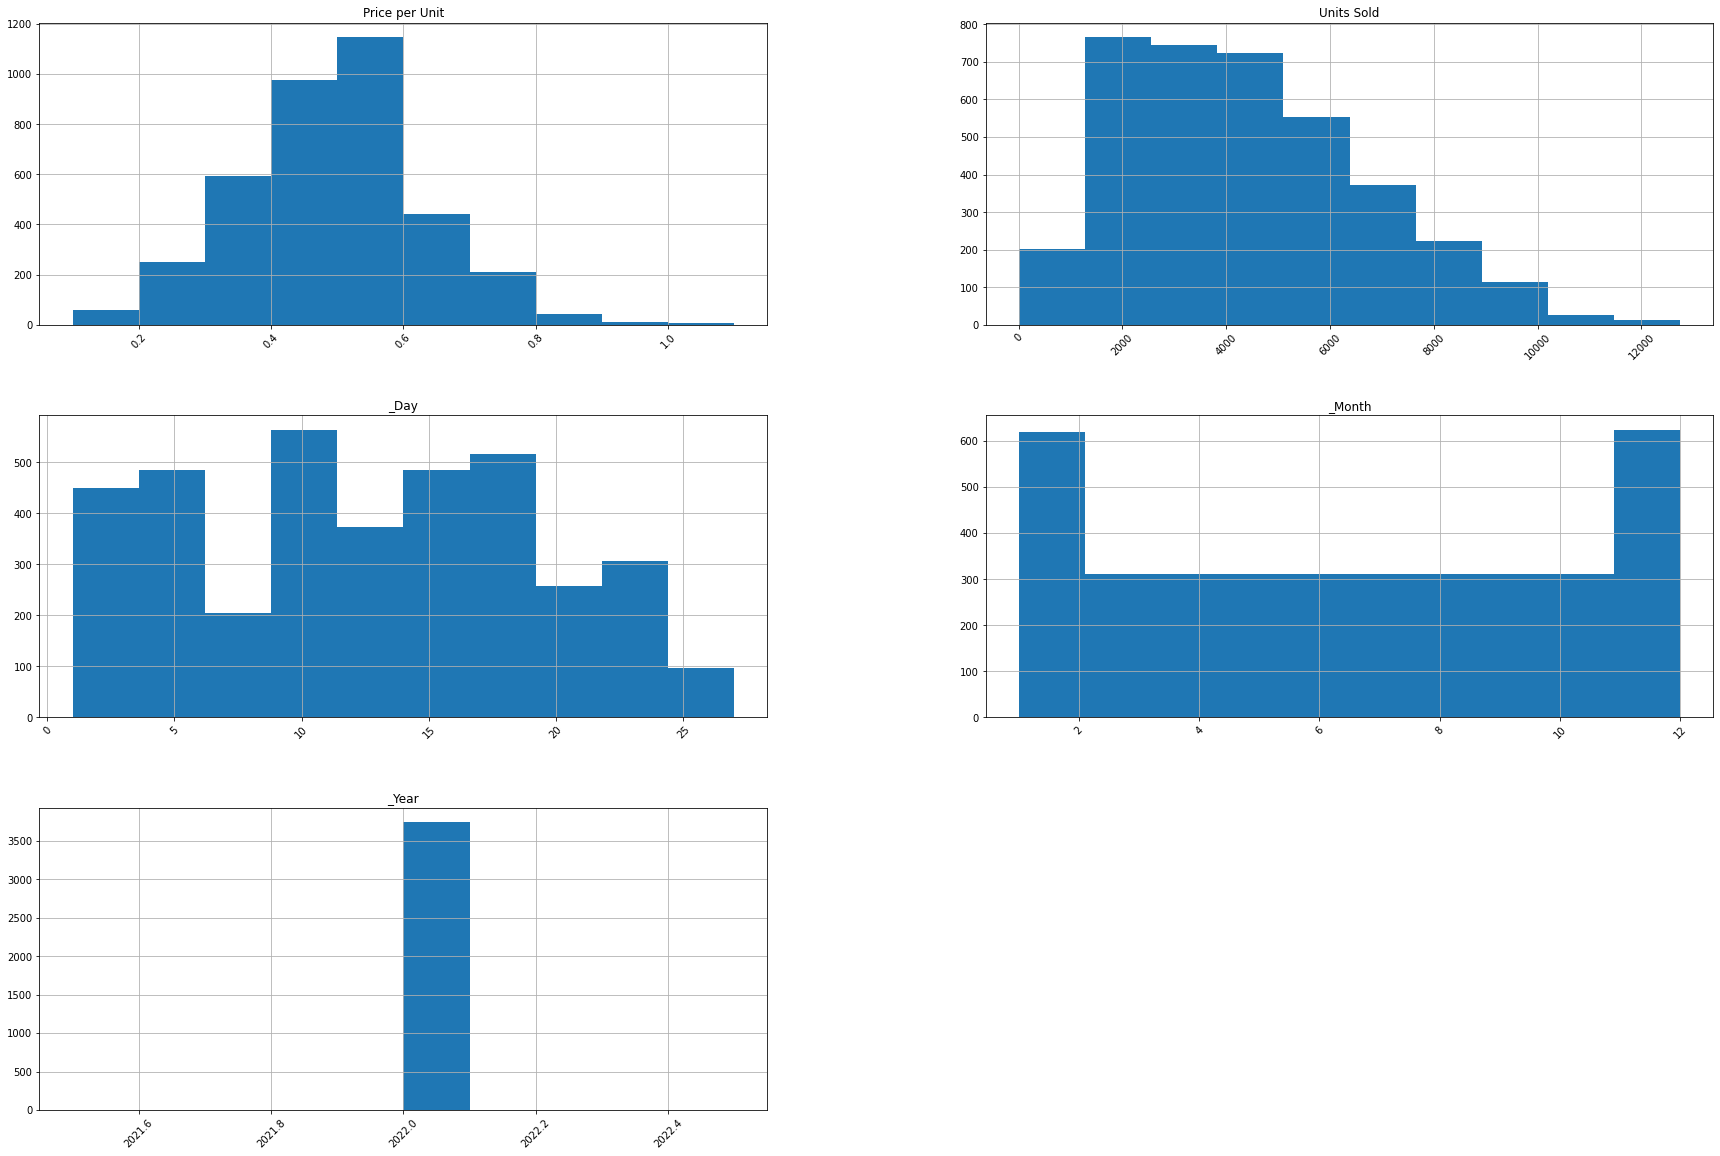

In [112]:
# Histograma dos Dados
df_analysis.hist(figsize = (30,20), xrot = 45)

In [113]:
# Checar possíveis números-chave
df_analysis.describe()

,Price per Unit,Units Sold,_Day,_Month,_Year
count,3739.000000,3739.000000,3739.000000,3739.000000,3739.0
mean,0.480342,4399.705804,12.468574,6.507355,2022.0
std,0.145450,2275.344133,6.709421,3.448953,0.0
min,0.100000,0.000000,1.000000,1.000000,2022.0
25%,0.400000,2500.000000,6.000000,4.000000,2022.0
50%,0.500000,4000.000000,12.000000,7.000000,2022.0
75%,0.550000,5750.000000,17.000000,10.000000,2022.0
max,1.100000,12750.000000,27.000000,12.000000,2022.0


In [135]:
mediana_preco = sts.median(df_analysis["Price per Unit"])
print(mediana_preco)
# O valor da mediana e da moda são parecidos, o que indica poucos outliers

0.49999999999999994


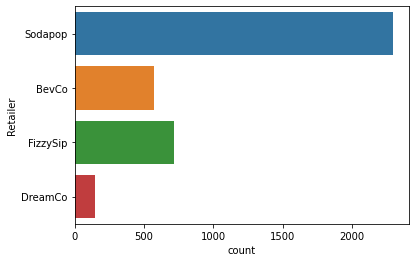

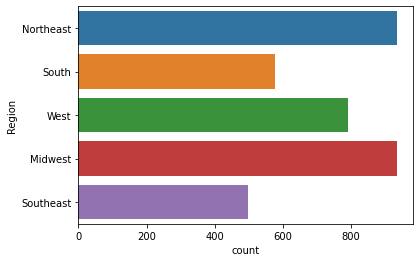

In [115]:
for column in df_analysis.select_dtypes(include='object'):
    if df_analysis[column].nunique() < 6:
        sns.countplot(y=column, data=df_analysis)
        plt.show()

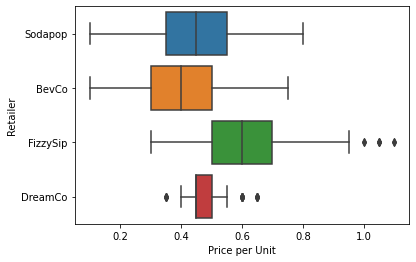

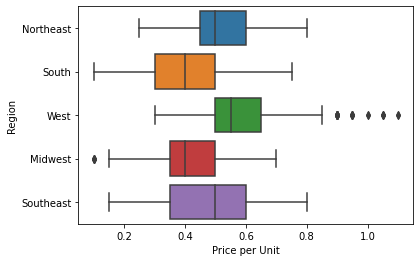

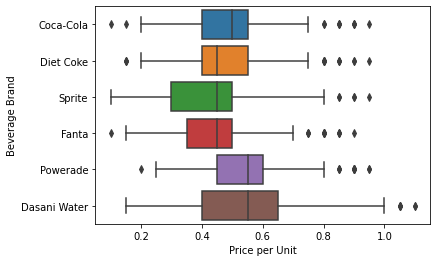

In [116]:
for column in df_analysis.select_dtypes(include='object'):
    if df_analysis[column].nunique() < 10:
        sns.boxplot(y=column, x='Price per Unit', data=df_analysis)
        plt.show()

<AxesSubplot:xlabel='Units Sold', ylabel='Region'>

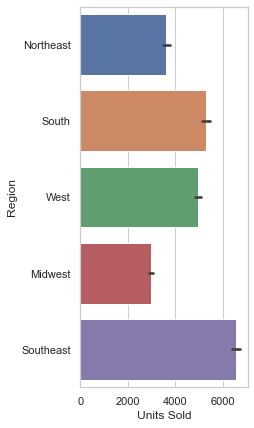

In [132]:
f, ax = plt.subplots(figsize=(3, 7))
sns.barplot(x="Units Sold", y="Region", data=df_analysis)

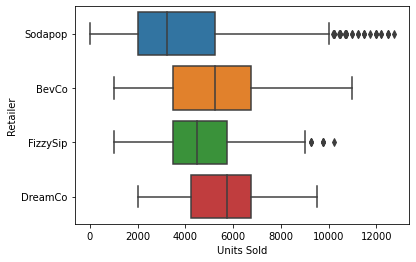

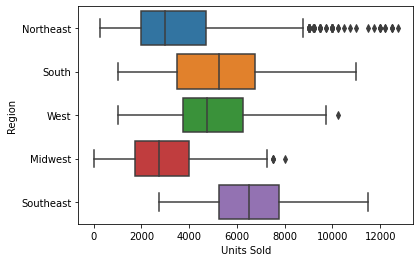

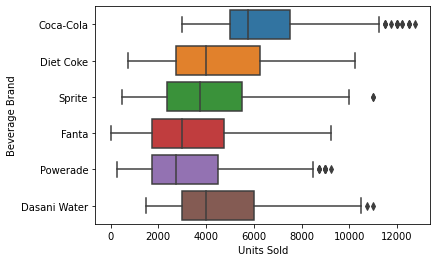

In [117]:
for column in df_analysis.select_dtypes(include='object'):
    if df_analysis[column].nunique() < 10:
        sns.boxplot(y=column, x='Units Sold', data=df_analysis)
        plt.show()

# Conclusões

In [ ]:
# A região sudeste é que mais vende unidades
# Coca-Cola é o produto mais vendido
# Oeste é a região com os maiores preços
# Dasani Water e Powerade possuem os preços mais caros
# DreamCo é a distribuidora com mais unidades vendidas